In [37]:
import pandas as pd
import os
df=pd.read_csv('Billionaires Statistics Dataset.csv')
billionaires = [
    "Elon Musk",
    "Jeff Bezos"    ,
    "Bernard Arnault & family",
    "Gautam Adani",
    "Bill Gates",
    "Mukesh Ambani",
    "Mark Zuckerberg",
    "Warren Buffett",
]
df = df[df['personName'].isin(billionaires) ]
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
15,16,64400,Technology,Mark Zuckerberg,38.0,United States,Palo Alto,Facebook,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
23,24,47200,Diversified,Gautam Adani,60.0,India,Ahmedabad,"Infrastructure, commodities",Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880


In [38]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
path_to_image='./images/elon_musk/0961eecbf9.jpg'
img = cv2.imread(path_to_image)
# img.shape


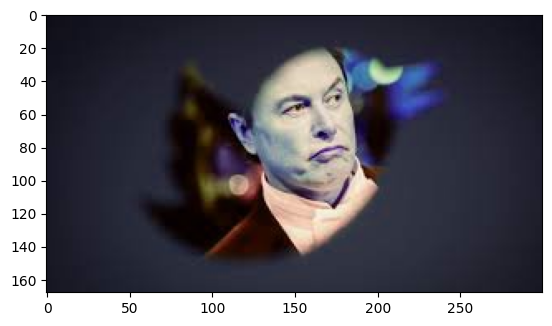

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[17, 17, 17, ..., 20, 20, 20],
       [17, 17, 17, ..., 20, 20, 20],
       [17, 17, 17, ..., 20, 20, 20],
       ...,
       [26, 26, 26, ..., 27, 27, 27],
       [26, 26, 26, ..., 27, 27, 27],
       [26, 26, 26, ..., 27, 27, 27]], dtype=uint8)

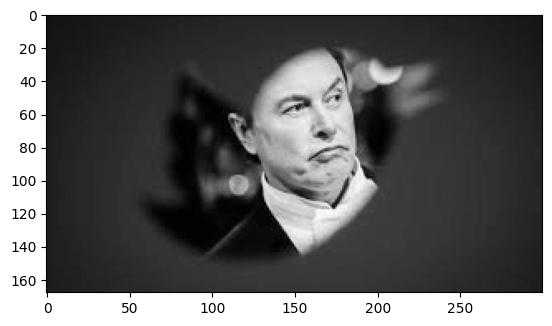

In [42]:
plt.imshow(gray,cmap='gray')

In [43]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[128,  26,  71,  71]])

In [44]:
(x,y,w,h) = faces[0]
x,y,w,h

(128, 26, 71, 71)

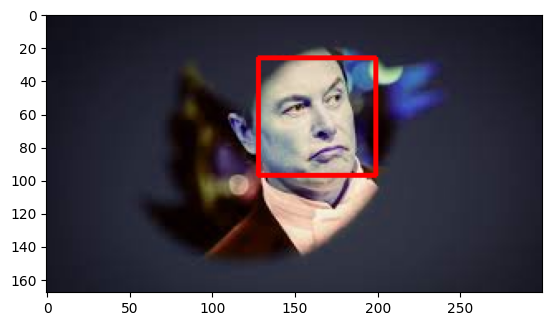

In [45]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

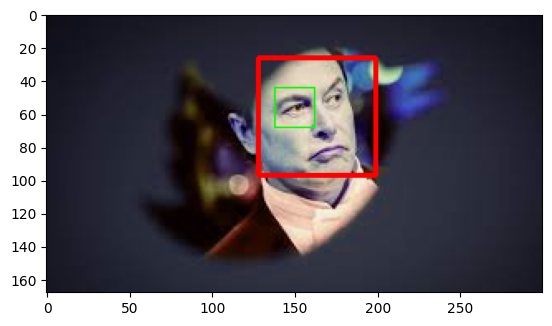

In [46]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

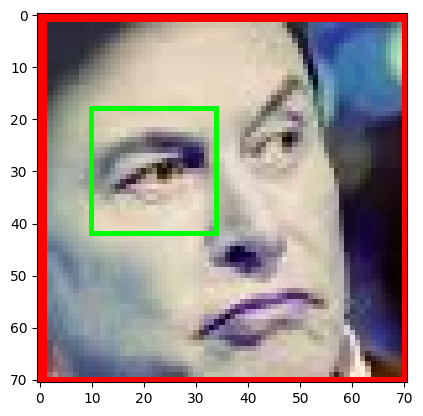

In [47]:
plt.imshow(roi_color, cmap='gray')

In [48]:
cropped_img = np.array(roi_color)
cropped_img.shape

(71, 71, 3)

In [49]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

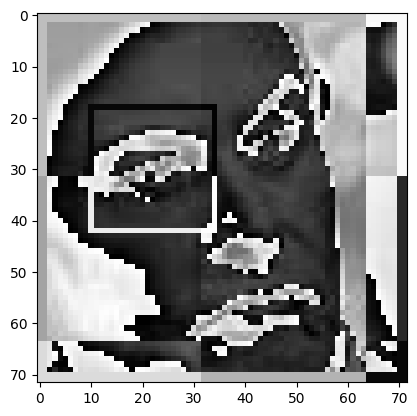

In [50]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [51]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    cropped_array=[]
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
        # eyes = eye_cascade.detectMultiScale(roi_color)
        # if len(eyes) >= 2:
        cropped_array.append(roi_color)

    return cropped_array            

In [52]:
def display_all_cropped(cropped_image):
    num=len(cropped_image)
    figure, axis = plt.subplots(num, 1, squeeze=False) 
    for index in range(num):
        axis[index,0].imshow(cropped_image[index])
    plt.show()

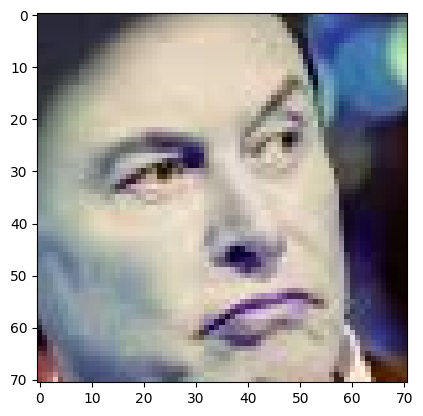

In [53]:
cropped_image = get_cropped_image(path_to_image)
display_all_cropped(cropped_image)

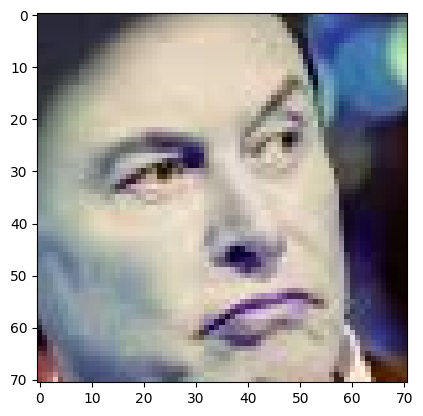

In [54]:
cropped_image1 = get_cropped_image(path_to_image)
if len(cropped_image1) != 0:
    display_all_cropped(cropped_image1)
else:
    print("No Face Detected")

In [55]:

path_to_data = "./images/"
path_to_cr_data = "./images/cropped/"


In [56]:
import shutil
# if os.path.exists(path_to_cr_data):
#      shutil.rmtree(path_to_cr_data)
# os.mkdir(path_to_cr_data)

In [57]:
import os
cropped_image_dirs = []
celebrity_file_names_dict = {}
def saving_cropped_to_location(path_to_data,path_to_cr_data):
    img_dirs = []
    for entry in os.scandir(path_to_data):
        if entry.is_dir():
            img_dirs.append(entry.path)

    for img_dir in img_dirs:
        count = 1
        celebrity_name = img_dir.split('/')[-1]
        celebrity_file_names_dict[celebrity_name] = []
        for entry in os.scandir(img_dir):
            roi_color = get_cropped_image(entry.path)
            for single_roi in roi_color:
                cropped_folder = path_to_cr_data + celebrity_name

                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, single_roi)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1



In [58]:
saving_cropped_to_location(path_to_data,path_to_cr_data)

Generating cropped images in folder:  ./images/cropped/bernard_arnault
Generating cropped images in folder:  ./images/cropped/bill_gates
Generating cropped images in folder:  ./images/cropped/elon_musk
Generating cropped images in folder:  ./images/cropped/gautam_adani
Generating cropped images in folder:  ./images/cropped/jeff_bezos
Generating cropped images in folder:  ./images/cropped/mark_zuckerberg
Generating cropped images in folder:  ./images/cropped/mukesh_ambani
Generating cropped images in folder:  ./images/cropped/warren_buffett


In [59]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bernard_arnault': ['./images/cropped/bernard_arnault\\bernard_arnault1.png',
  './images/cropped/bernard_arnault\\bernard_arnault10.png',
  './images/cropped/bernard_arnault\\bernard_arnault100.png',
  './images/cropped/bernard_arnault\\bernard_arnault101.png',
  './images/cropped/bernard_arnault\\bernard_arnault102.png',
  './images/cropped/bernard_arnault\\bernard_arnault103.png',
  './images/cropped/bernard_arnault\\bernard_arnault104.png',
  './images/cropped/bernard_arnault\\bernard_arnault105.png',
  './images/cropped/bernard_arnault\\bernard_arnault106.png',
  './images/cropped/bernard_arnault\\bernard_arnault107.png',
  './images/cropped/bernard_arnault\\bernard_arnault108.png',
  './images/cropped/bernard_arnault\\bernard_arnault109.png',
  './images/cropped/bernard_arnault\\bernard_arnault11.png',
  './images/cropped/bernard_arnault\\bernard_arnault110.png',
  './images/cropped/bernard_arnault\\bernard_arnault111.png',
  './images/cropped/bernard_arnault\\bernard_arnault112

In [60]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bernard_arnault': 0,
 'bill_gates': 1,
 'elon_musk': 2,
 'gautam_adani': 3,
 'jeff_bezos': 4,
 'mark_zuckerberg': 5,
 'mukesh_ambani': 6,
 'warren_buffett': 7}

In [61]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

C:\Users\surya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [62]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1103, 4096)

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=28,test_size=0.2)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5384615384615384

In [66]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        34
           1       1.00      0.06      0.12        16
           2       0.33      0.45      0.38        20
           3       0.67      0.55      0.60        33
           4       0.47      0.50      0.49        36
           5       0.58      0.69      0.63        16
           6       0.49      0.69      0.57        39
           7       0.72      0.67      0.69        27

    accuracy                           0.54       221
   macro avg       0.61      0.51      0.50       221
weighted avg       0.59      0.54      0.53       221



In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [69]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.565787,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.325469,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.556748,{'logisticregression__C': 1}


In [70]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [71]:
best_estimators['svm'].score(X_test,y_test)

0.6108597285067874

In [72]:
best_estimators['random_forest'].score(X_test,y_test)

0.3438914027149321

In [73]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6199095022624435

In [74]:
best_clf = best_estimators['svm']

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[20,  0,  1,  2,  4,  1,  5,  1],
       [ 2,  4,  0,  2,  0,  1,  2,  5],
       [ 3,  1, 10,  1,  1,  1,  3,  0],
       [ 0,  1,  1, 18,  2,  0, 11,  0],
       [ 4,  0,  5,  0, 23,  1,  3,  0],
       [ 0,  0,  1,  0,  1, 14,  0,  0],
       [ 3,  0,  2,  8,  0,  0, 26,  0],
       [ 0,  2,  0,  0,  3,  1,  1, 20]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

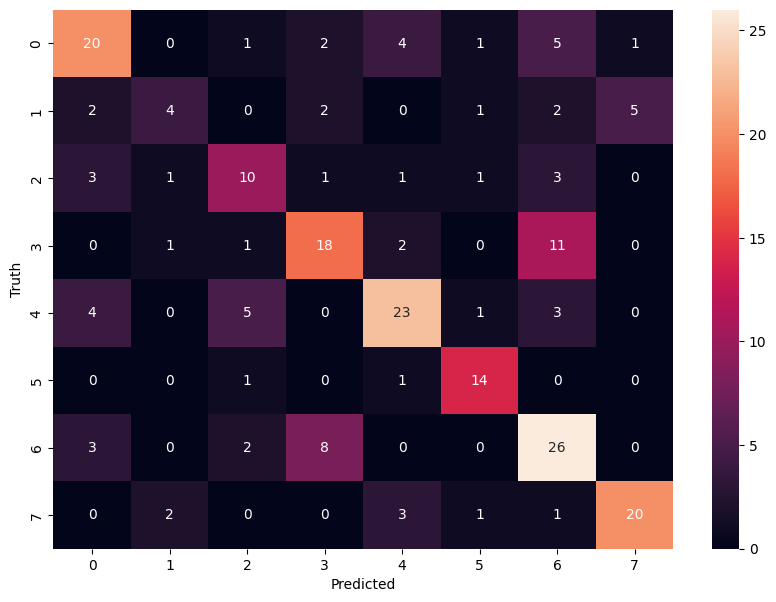

In [76]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [78]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))